# 0. Imports

In [18]:
import os
import sys
import numpy as np
%load_ext autoreload
%autoreload 2

git_dir = r"C:\Werk\Projecten\P1414_ROI\Github_P1414\P1414"
sys.path.append(os.path.join(git_dir, 'Code'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox/Readers'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Model specifications 

## 1.1. Select basemodel

In [8]:
from notebooks.background_scripting.v1.select_basemodel import ModelSettings

model_settings = ModelSettings()
model_settings.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Model settings are:'

{
    "folder": "D:\\work\\Project\\P1414\\Models_SAS\\Model_database",
    "model": "V16_HHR",
    "scenario_name": "run"
}


## 1.2. Model settings

In [32]:
import shutil
from notebooks.background_scripting.v1.modify_mdu import ModifyMDU, copy_model

# model_path = copy_model(os.path.join(model_settings.settings['folder'], model_settings.settings['model']), model_settings.settings['scenario_name'])
modify_mdu = ModifyMDU(model_path)
modify_mdu.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'MDU settings are:'

{
    "tStart": 0.0,
    "tStop": 168.0,
    "mapInterval": 20.0,
    "DHYDRO location": "C:\\Program Files\\Deltares\\D-HYDRO Suite 2023.01 1D2D\\plugins\\DeltaShell.Dimr\\kernels\\x64\\dimr\\scripts\\run_dimr.bat"
}


## 1.3. Dambreak location

In [37]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import DambreachWidget

dambreachkWidget = DambreachWidget(model_path)
dambreachkWidget.draw_map()

Map(center=[51.97018251148096, 4.650818789646372], controls=(ZoomControl(options=['position', 'zoom_in_text', …

HTML(value='<b style="color:black;font-size:18px;">Done! Inspect your results (4/4) </b>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xdc\x00\x00\x03\x84\x08\x03\x00\x00\x00\x8c\xe6\…

## 1.4. Dambreak settings

In [38]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import ModifyDambreak

add_dambreak = ModifyDambreak(model_path, dambreachkWidget.settings, dambreachkWidget.keringen)
add_dambreak.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Dambreak settings are:'

{
    "crestLevelIni": -2.0,
    "t0": 0.0,
    "timeToBreachToMaximumDepth": 360.0,
    "crestLevelMin": -2.0,
    "breachWidthIni": 5.0,
    "f1": 1.3,
    "f2": 0.04,
    "uCrit": 0.2
}


## 1.5. Boundary conditions

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Boundary conditions are:'

{
    "Waterlevel North Sea": 4.0,
    "Waterlevel Markermeer": 0.0,
    "Rhine basic discharge": 5000.0,
    "Rhine peak discharge": 20000.0,
    "Rhine event start": 0.0,
    "Rhine event duration": 86400.0
}


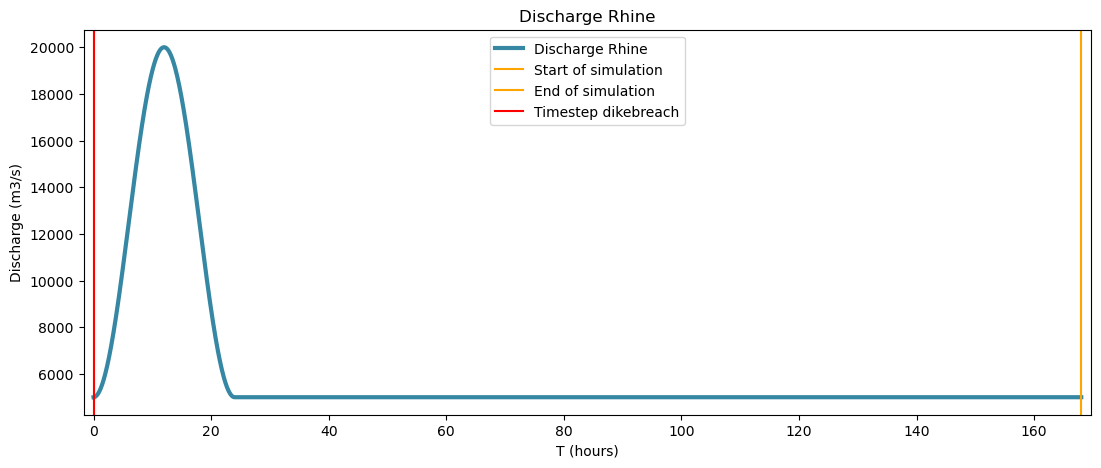

In [46]:
from notebooks.background_scripting.v1.modify_boundaries import ModifyBoundaries, ModifyRhineDischarge

modify_boundaries = ModifyBoundaries(model_path, modify_mdu.settings, add_dambreak.dambreak_settings)
modify_boundaries.display_widgets()

# 2. Run Model

In [47]:
from notebooks.background_scripting.v1.model_runner import ModelRunner

model_runner = ModelRunner(model_path)
model_runner.display_widgets()

Button(description='Run model!', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#3…

Output()

# 3. Post processing

## 3.1. Plot map

In [ ]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsMap, MapPlotter

output_path = os.path.join(model_path, 'dflowfm\DFM_OUTPUT_test')
plot_settings = PlotSettingsMap(output_path)
plot_settings.display_widgets()

## 3.2. Plot dambreak

In [ ]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsBreach, BreachPlotter


output_path = os.path.join(model_path, 'dflowfm\DFM_OUTPUT_test')
plot_settings = PlotSettingsBreach(output_path)
plot_settings.display_widgets()

